# Exploratory Data Analysis 

## 1. Understanding project

In [38]:
import pandas as pd

datasets = {}

for year in range(2017, 2022):
    filename = f'Datatesis_{year}.dta'
    datasets[f'data_{year}'] = pd.io.stata.read_stata(filename)

# Concatenate
data = pd.concat(datasets.values(), ignore_index=True)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316455 entries, 0 to 316454
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   año          316455 non-null  object  
 1   horas        316453 non-null  float64 
 2   edad         316455 non-null  int8    
 3   salario      126464 non-null  float64 
 4   fac500a      316455 non-null  float32 
 5   urbano       316455 non-null  category
 6   hombre       316455 non-null  category
 7   escolaridad  316455 non-null  category
 8   formal       316455 non-null  category
 9   logsal       126464 non-null  float32 
 10  edadsq       316455 non-null  float32 
dtypes: category(4), float32(3), float64(2), int8(1), object(1)
memory usage: 12.4+ MB


## 2. Data preparation

### The problem

The initial purpose is creating a model of salary based in Mincer equation (1966). So the dependent variable is log-salary. The others variables are here:

* <b>año</b>
* <b>horas</b>: Worked hours per week 
* <b>edad</b>: Years old
* <b>salario</b>: Monthly nominal wage in soles 
* <b>fac500a</b>: Expansion factor
* <b>urbano</b>: Urban or rural area indicator
* <b>hombre</b>: Gender indicator
* <b>escolaridad</b>: education level
* <b>formal</b>: Formal or informal job indicator
* <b>logsal</b>: Logarithm of salary
* <b>edadsq</b>: Age squared

In [40]:
data.shape

(316455, 11)

In [41]:
data.columns

Index(['año', 'horas', 'edad', 'salario', 'fac500a', 'urbano', 'hombre',
       'escolaridad', 'formal', 'logsal', 'edadsq'],
      dtype='object')

In [61]:
data.head(20)

,año,horas,edad,salario,fac500a,urbano,hombre,escolaridad,formal,logsal,edadsq
0,2017,40.0,43,1299.833333,126.542603,Urbana,Hombre,[sec. completa - sup. no univ incompleta],Formal,7.169991,1849.0
1,2017,84.0,46,949.916667,68.433701,Urbana,Hombre,[sec. completa - sup. no univ incompleta],Informal,6.856374,2116.0
2,2017,48.0,44,1292.666667,126.542603,Urbana,Hombre,[prim. completa - sec. incompleta],Informal,7.164463,1936.0
3,2017,24.0,71,NaN,48.459030,Urbana,Hombre,[sin nivel - prim. incompleta],Informal,NaN,5041.0
4,2017,56.0,36,1199.833333,126.542603,Urbana,Hombre,[sin nivel - prim. incompleta],Informal,7.089938,1296.0
5,2017,95.0,34,NaN,90.904594,Urbana,Mujer,[sec. completa - sup. no univ incompleta],Informal,NaN,1156.0
6,2017,21.0,15,NaN,69.574257,Urbana,Mujer,[prim. completa - sec. incompleta],Informal,NaN,225.0
7,2017,48.0,50,775.583333,68.433701,Urbana,Hombre,[sin nivel - prim. incompleta],Informal,6.653615,2500.0
8,2017,48.0,53,NaN,68.433701,Urbana,Hombre,[sin nivel - prim. incompleta],Informal,NaN,2809.0
9,2017,42.0,30,1999.750000,90.904594,Urbana,Mujer,[sup. univ. completa - posgrado],Formal,7.600778,900.0


In [43]:
null_percentage = data.isnull().mean() * 100

In [44]:
null_percentage

año             0.000000
horas           0.000632
edad            0.000000
salario        60.037288
fac500a         0.000000
urbano          0.000000
hombre          0.000000
escolaridad     0.000000
formal          0.000000
logsal         60.037288
edadsq          0.000000
dtype: float64

Don't forget that the data is from a survey. So, it's normal that people don't want to reveal some information as their salaries. Here, more than 60% of salary data is null. The other variables practically don't have null values.
It's important to highlight the following:
* <b>The analysis will continue without a treatment for null vallues because there aren't few cases</b>

In [45]:
# backup 
data_bk = data

## 3  : Graph and descriptive numeric analysis

### 'Logsal'

Logsal is the objective variable of this data group. So it's important to do a deep analysis of this.

In [46]:
# Resumen de estadística descriptiva:

data['logsal'].describe()

count    126464.000000
mean          6.891747
std           0.931616
min           1.609438
25%           6.472346
50%           6.973777
75%           7.492342
max          10.463784
Name: logsal, dtype: float64

In [10]:
#pip install seaborn --upgrade

Note: you may need to restart the kernel to use updated packages.


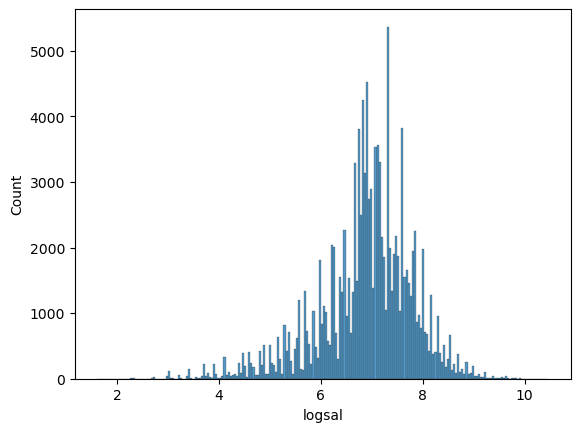

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
# Seaborn histogram:

sns.histplot(data['logsal'])
plt.show()

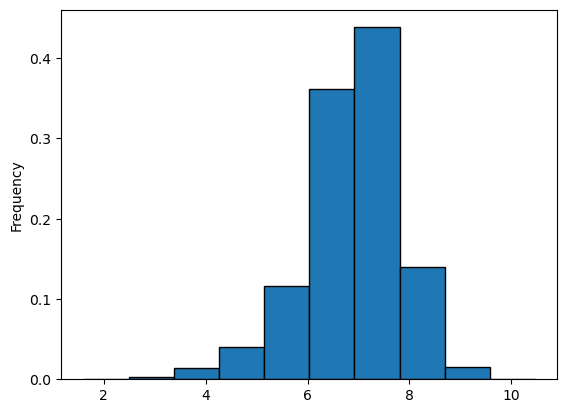

In [48]:
# Pandas histogram:

data['logsal'].plot(kind='hist',density=True, edgecolor = 'k')
plt.show()

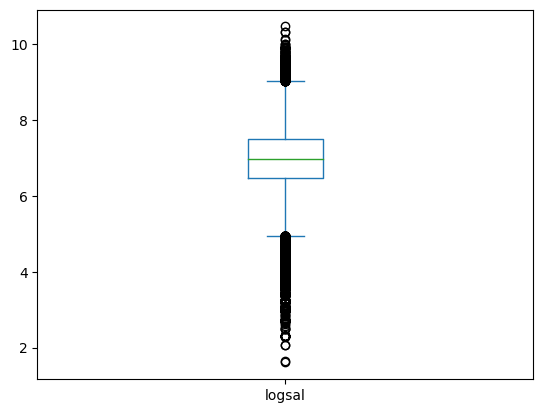

In [49]:
# Box plot:

data['logsal'].plot(kind='box')
plt.show()

It's easy to see:

* Positive asymetry
* Outliers

In [50]:
# Interquantile range and variation coefficient
import numpy as np
interquantile = lambda x: x.quantile(0.75)-x.quantile(0.25)
cv = lambda x: x.std()/x.mean()

f = {'logsal' : [interquantile, cv, np.mean]}

data.agg(IQ=('logsal', interquantile), CV=('logsal', cv), mean=('logsal', np.mean))

,logsal
IQ,1.019996
CV,0.135178
mean,6.891747


### Dependent numeric variables

In [51]:
#Filtering numeric variables
list(data.describe().columns)

['horas', 'edad', 'salario', 'fac500a', 'logsal', 'edadsq']

In [52]:
list_quantitatives= list(data.describe().columns)
list_quantitatives

['horas', 'edad', 'salario', 'fac500a', 'logsal', 'edadsq']

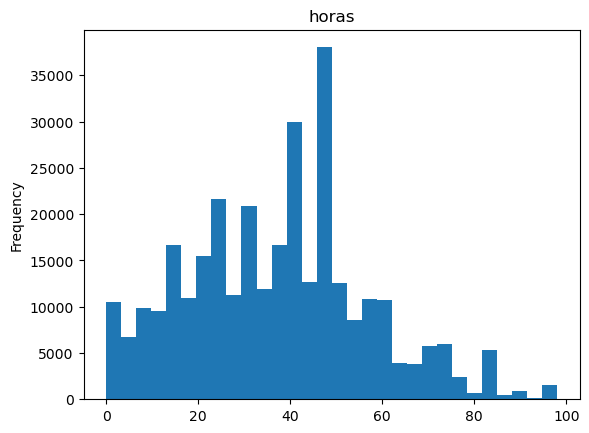

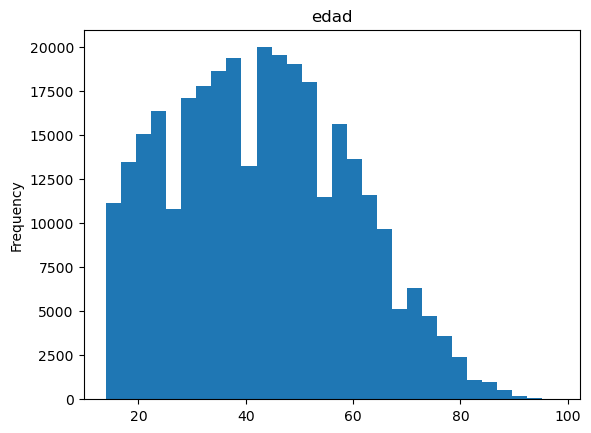

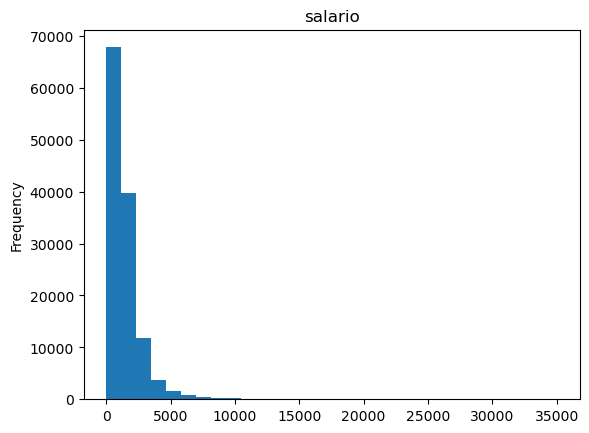

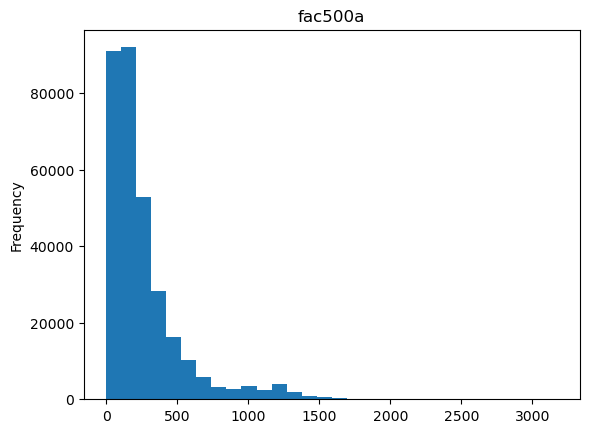

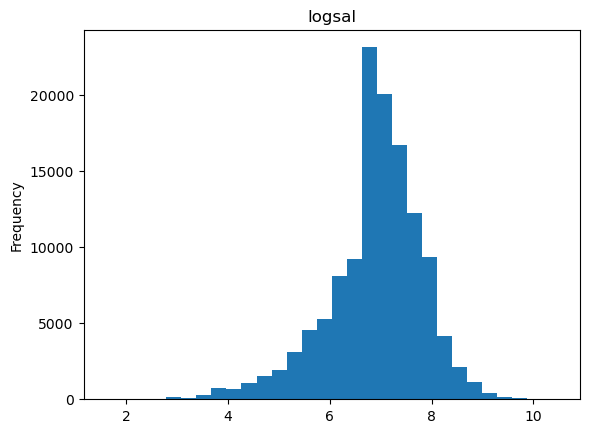

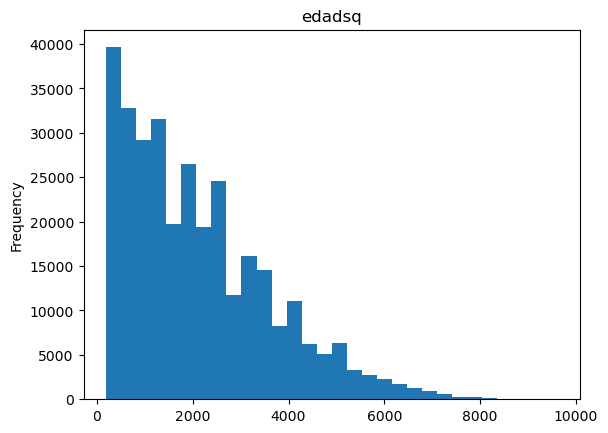

In [53]:
# histograms
for var in list_quantitatives:
    data[var].plot(kind='hist', title=var, bins=30)
    plt.show()

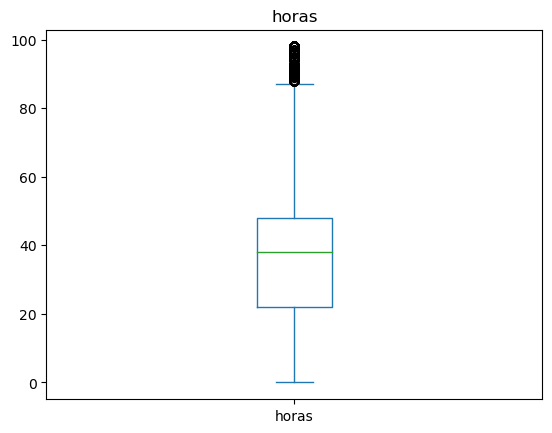

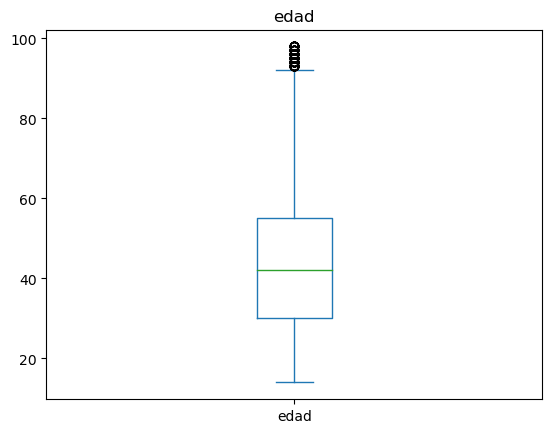

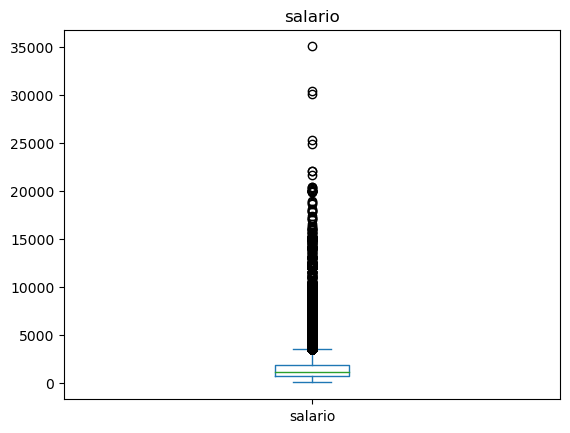

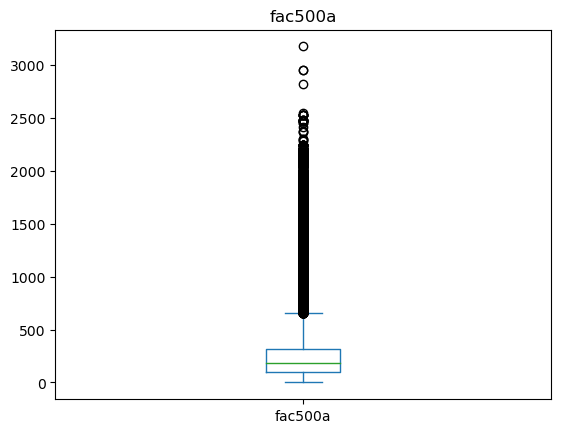

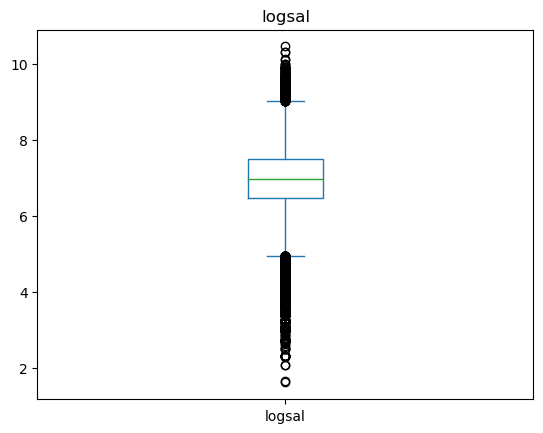

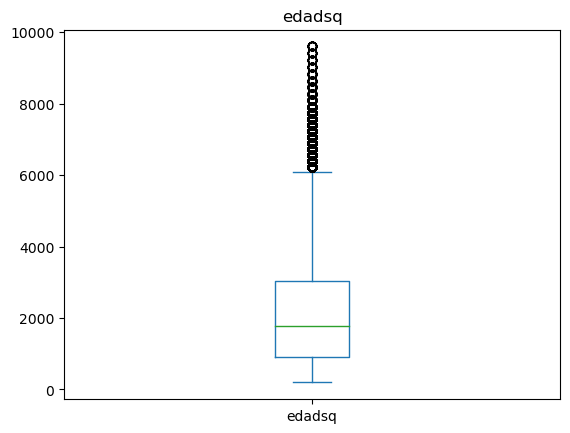

In [54]:
# box lpot
for var in list_quantitatives:
    data[var].plot(kind='box', title=var)
    plt.show()

### Reviewing the qualitative explanatory variables:

In [55]:
#filtering qualitative variables

# numeric variables
list_quantitatives = list(data.describe().columns)

#droping numeric variables 
list_qualitatives = data.drop(columns = list_quantitatives).columns
list_qualitatives

Index(['año', 'urbano', 'hombre', 'escolaridad', 'formal'], dtype='object')

In [57]:
data[list_qualitatives]

,año,urbano,hombre,escolaridad,formal
0,2017,Urbana,Hombre,[sec. completa - sup. no univ incompleta],Formal
1,2017,Urbana,Hombre,[sec. completa - sup. no univ incompleta],Informal
2,2017,Urbana,Hombre,[prim. completa - sec. incompleta],Informal
3,2017,Urbana,Hombre,[sin nivel - prim. incompleta],Informal
4,2017,Urbana,Hombre,[sin nivel - prim. incompleta],Informal
...,...,...,...,...,...
316450,2021,Rural,Mujer,[sin nivel - prim. incompleta],Informal
316451,2021,Rural,Hombre,[sin nivel - prim. incompleta],Informal
316452,2021,Rural,Mujer,[prim. completa - sec. incompleta],Informal
316453,2021,Rural,Hombre,[prim. completa - sec. incompleta],Informal


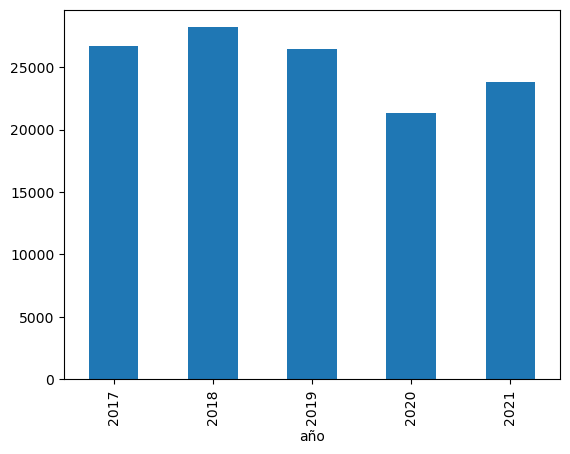

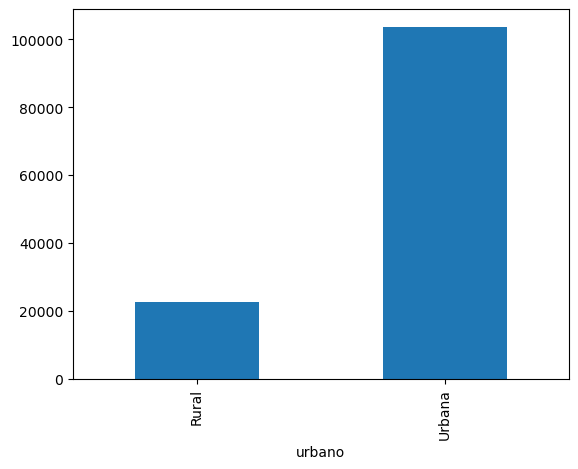

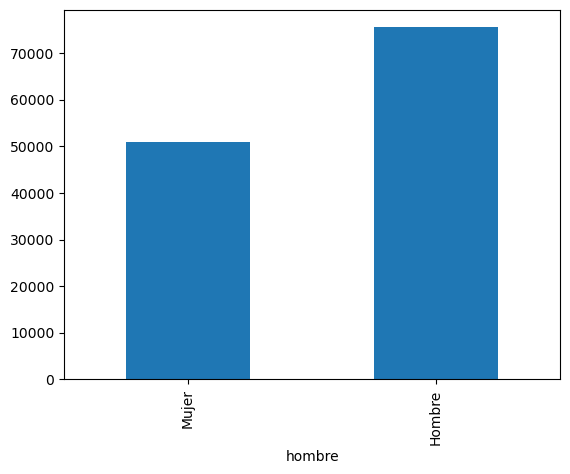

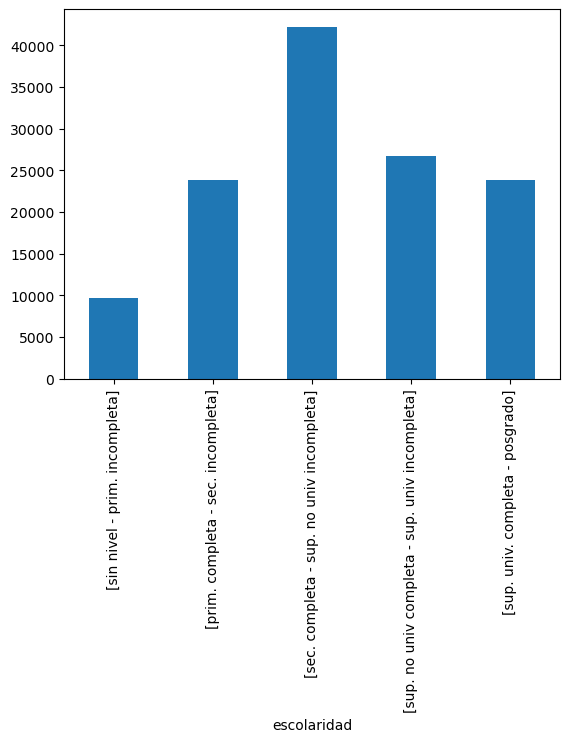

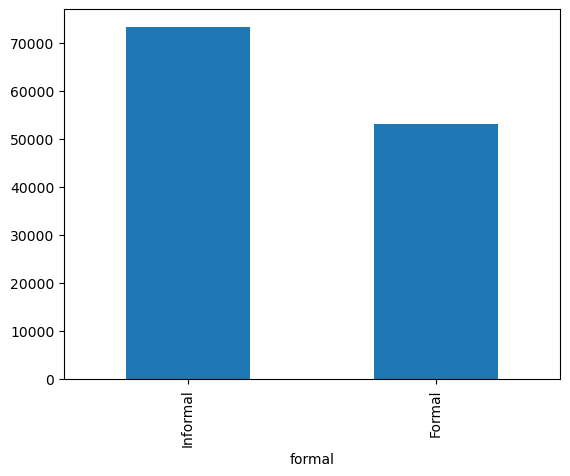

In [58]:
# frequency distribution of qual vars.
for var in list_qualitatives:
    data.groupby(var)['logsal'].count().plot.bar()
    plt.show()

### Target relation with numeric variables

In [59]:
#Droping nulls to create a database for correlation
base_cor= data.dropna(how='any')

In [60]:
base_cor

,año,horas,edad,salario,fac500a,urbano,hombre,escolaridad,formal,logsal,edadsq
0,2017,40.0,43,1299.833333,126.542603,Urbana,Hombre,[sec. completa - sup. no univ incompleta],Formal,7.169991,1849.0
1,2017,84.0,46,949.916667,68.433701,Urbana,Hombre,[sec. completa - sup. no univ incompleta],Informal,6.856374,2116.0
2,2017,48.0,44,1292.666667,126.542603,Urbana,Hombre,[prim. completa - sec. incompleta],Informal,7.164463,1936.0
4,2017,56.0,36,1199.833333,126.542603,Urbana,Hombre,[sin nivel - prim. incompleta],Informal,7.089938,1296.0
7,2017,48.0,50,775.583333,68.433701,Urbana,Hombre,[sin nivel - prim. incompleta],Informal,6.653615,2500.0
...,...,...,...,...,...,...,...,...,...,...,...
316427,2021,36.0,14,763.337158,74.623825,Rural,Hombre,[prim. completa - sec. incompleta],Informal,6.637700,196.0
316428,2021,48.0,60,763.337158,83.442795,Rural,Hombre,[sin nivel - prim. incompleta],Informal,6.637700,3600.0
316432,2021,30.0,77,391.742432,86.826111,Rural,Hombre,[sin nivel - prim. incompleta],Informal,5.970604,5929.0
316438,2021,44.0,47,1175.648763,319.067780,Rural,Hombre,[sec. completa - sup. no univ incompleta],Informal,7.069575,2209.0


[[1.         0.32486613]
 [0.32486613 1.        ]]


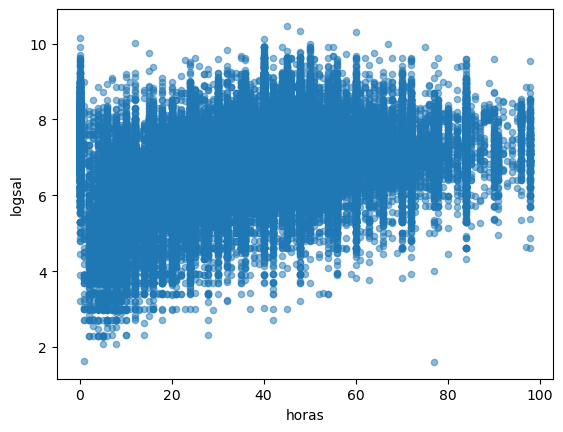

[[1.         0.24059594]
 [0.24059594 1.        ]]


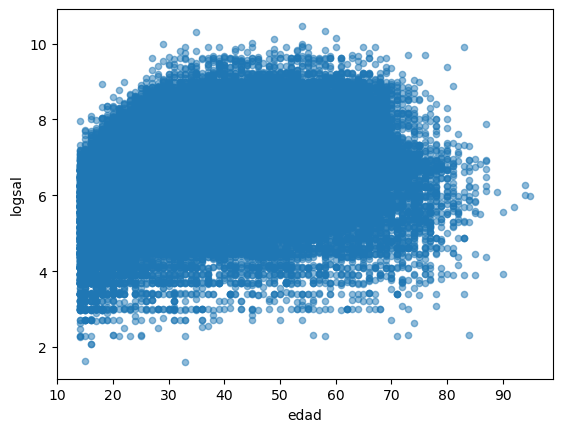

[[1.         0.78049047]
 [0.78049047 1.        ]]


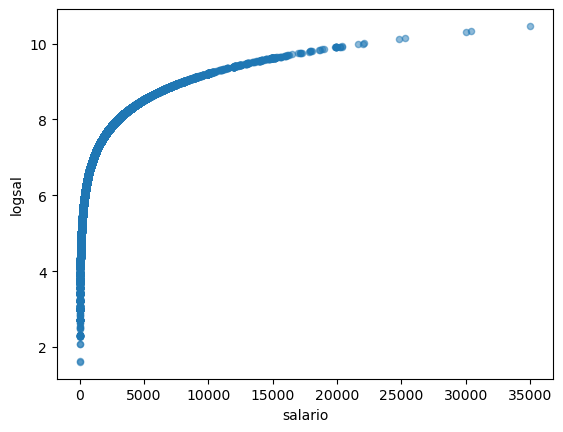

[[1.         0.05673013]
 [0.05673013 1.        ]]


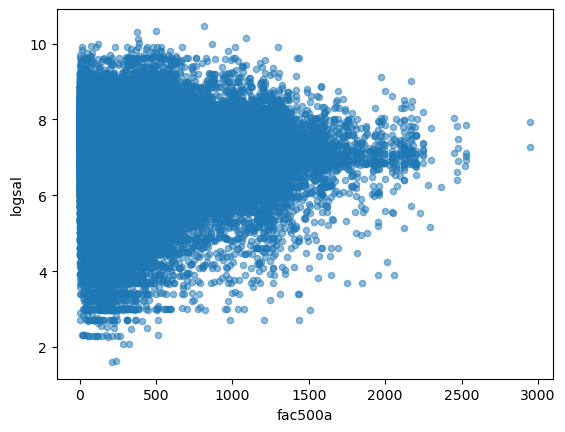

[[1. 1.]
 [1. 1.]]


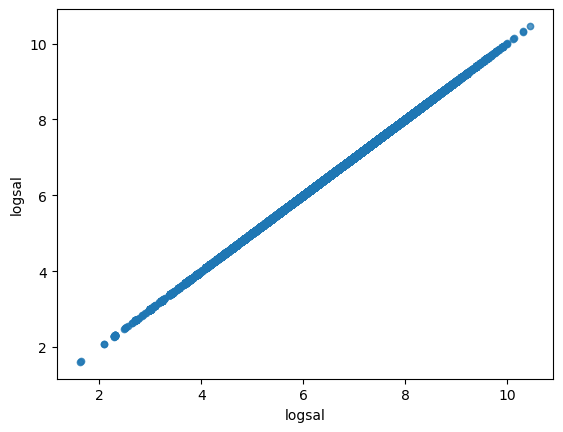

[[1.         0.18704372]
 [0.18704372 1.        ]]


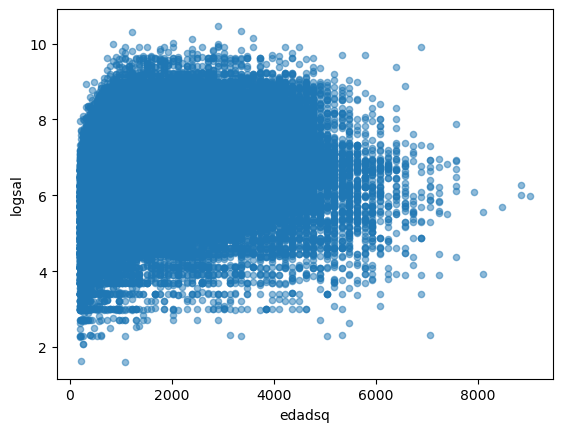

In [62]:
# Dispersion diagram of each variable with target variable (logsal):
import numpy as np

list_quantitatives = list(base_cor.describe().columns)
for var in list_quantitatives:
    print(np.corrcoef(base_cor['logsal'], base_cor[var]))
    data = pd.concat([base_cor['logsal'], base_cor[var]], axis=1)
    data.plot.scatter(x=var, y='logsal', alpha = 0.5)
    plt.show()

In [67]:
#Problem with droping columns
data=data_bk

### Relation between quantitative and qualitative variables 

Salary logarithm vs gender

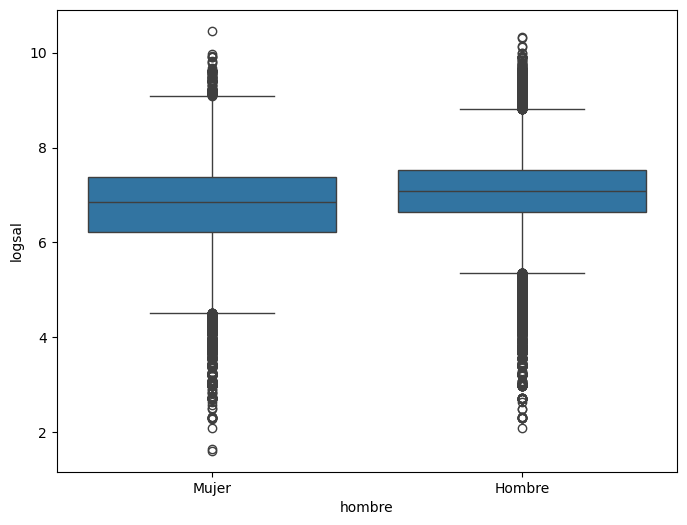

In [72]:
var = 'hombre'
datos = pd.concat([data['logsal'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="logsal", data=datos)
#fig.axis(ymin=0, ymax=800000)
plt.show()

Education level vs logarithm salary

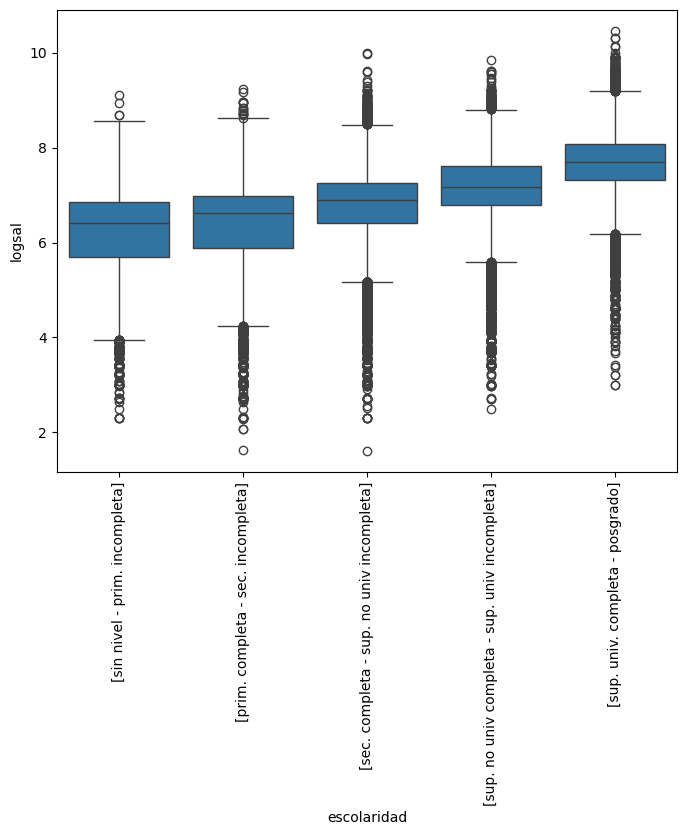

In [74]:
var = 'escolaridad'
datos = pd.concat([data['logsal'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="logsal", data=datos)
plt.xticks(rotation=90)
#fig.axis(ymin=0, ymax=800000)
plt.show()

There are considerable relations between these variables

### Relation between qualitative variables

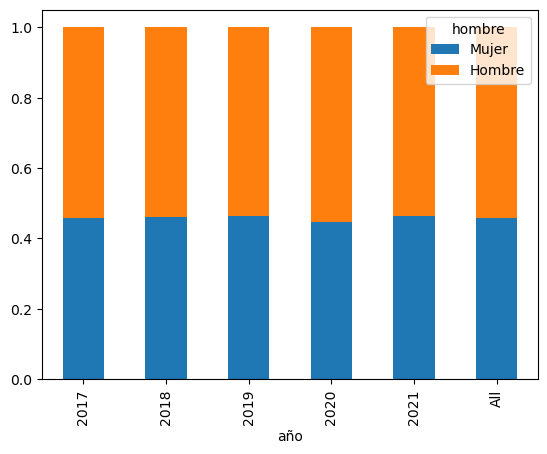

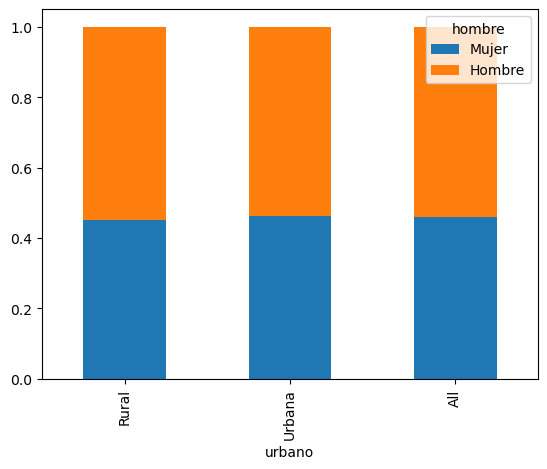

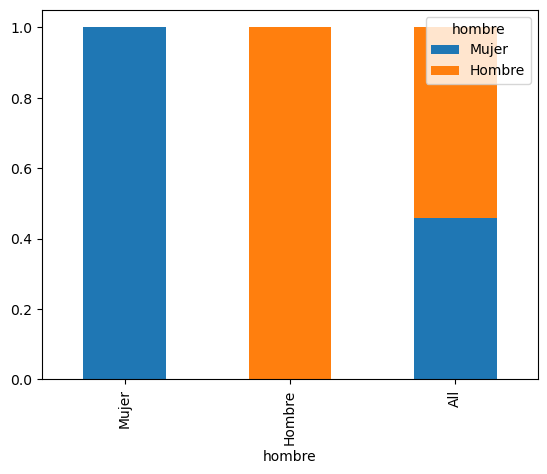

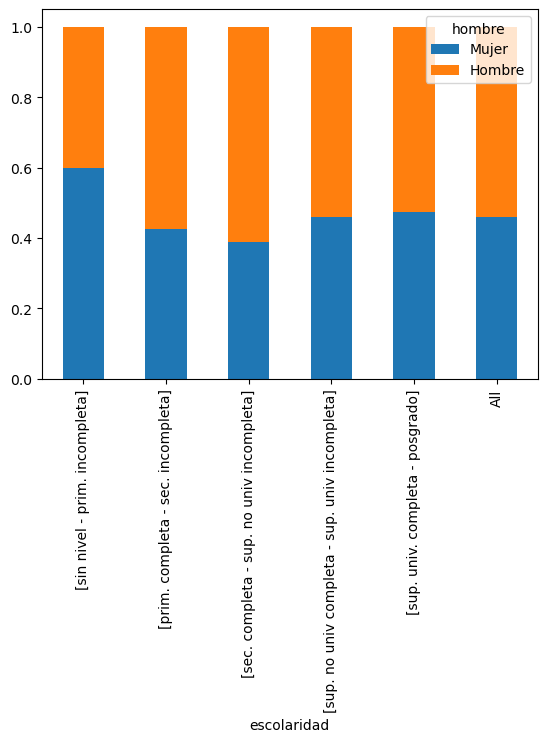

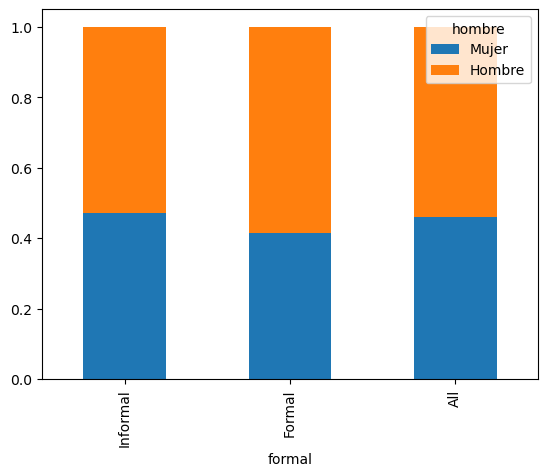

In [84]:
for var in list_qualitatives:
    cross = pd.crosstab(data[var],data['hombre'],margins = True,normalize = 'index')
    cross.plot.bar(stacked = True)
    plt.show()

There are no big differences showed in previus graphs. Maybe just in education level among genders

## 4. Qualitative and Quantitative Associations

It's time to use other tools to evidence relationship between target and the other variables

#### Correlation map

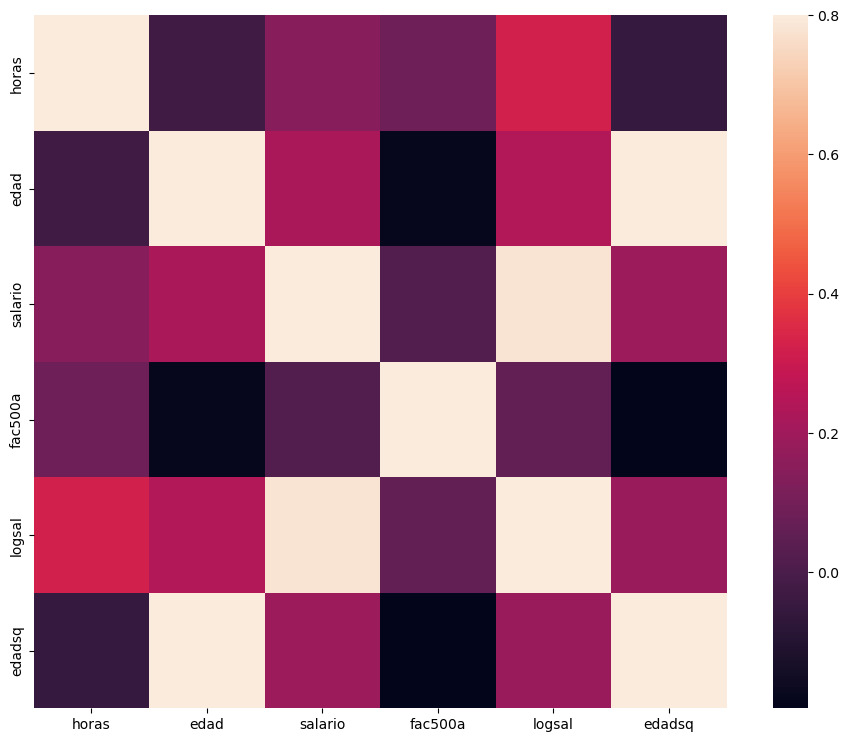

In [86]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

There is no problem between dependent variables because the variable #fac500a is just the expansion factor of the survey. And the exact correlation between age variables it's because edadsq=edad^2

Target correlation map

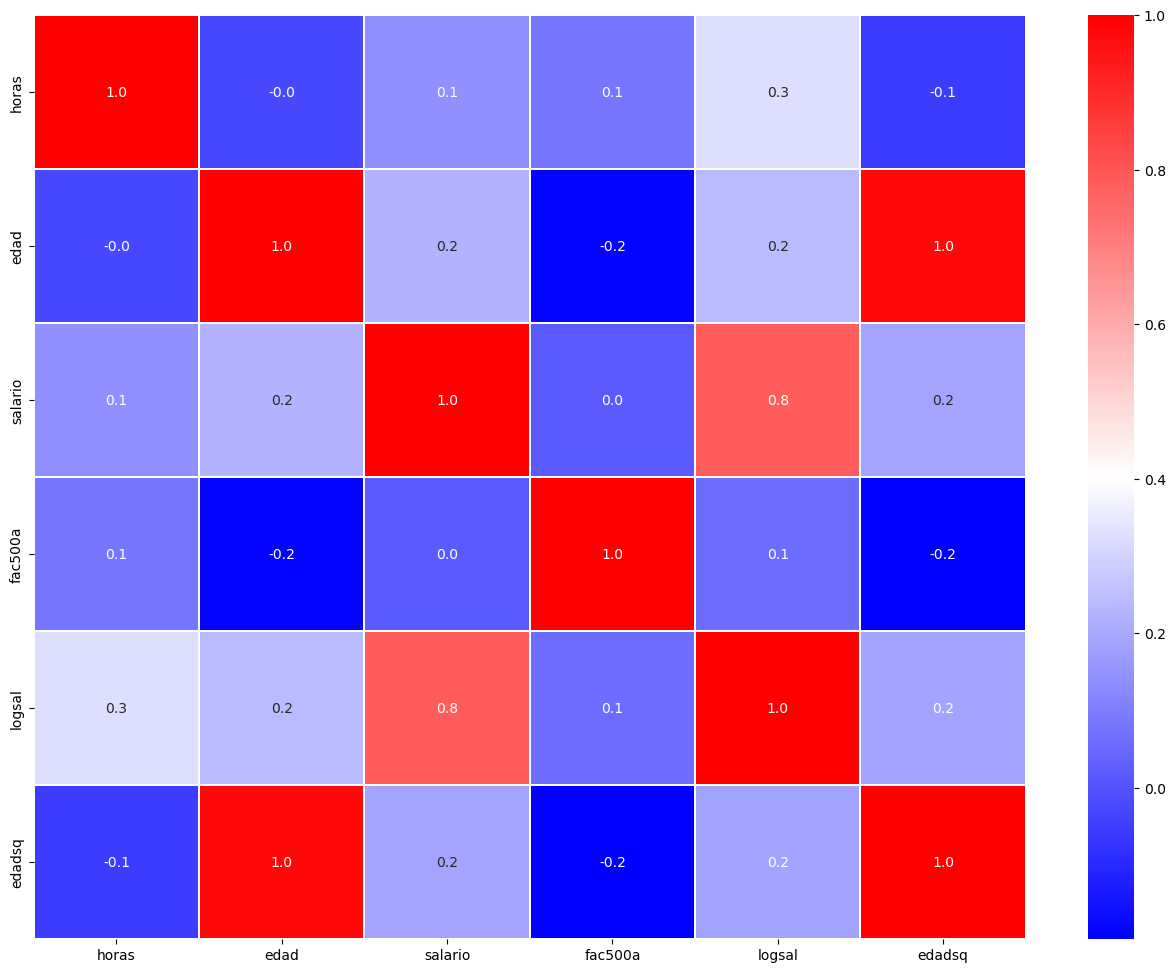

In [87]:
fig = plt.figure(figsize=(16,12)) 
sns.heatmap(corrmat,annot=corrmat,fmt='.1f',linewidth=0.2,cmap='bwr')
plt.show()

In [88]:
corr = data.corr()
corr[['logsal']].sort_values(by = 'logsal',ascending = False).style.background_gradient()

,logsal
logsal,1.000000
salario,0.780493
horas,0.324866
edad,0.240588
edadsq,0.187036
fac500a,0.056725


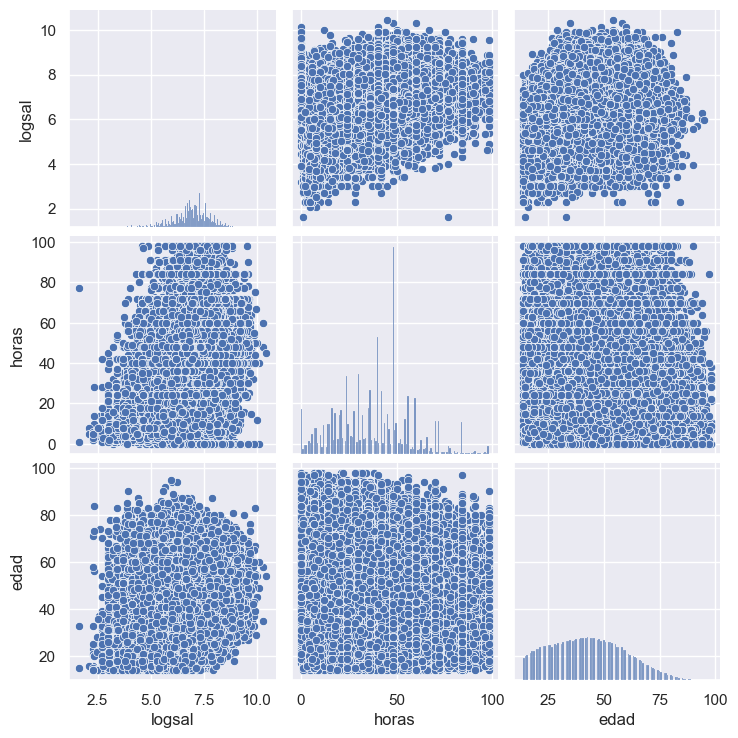

In [90]:
# Scatter plot:

sns.set()
cols = ['logsal', 'horas', 'edad']
sns.pairplot(data[cols], height = 2.5)
plt.show()

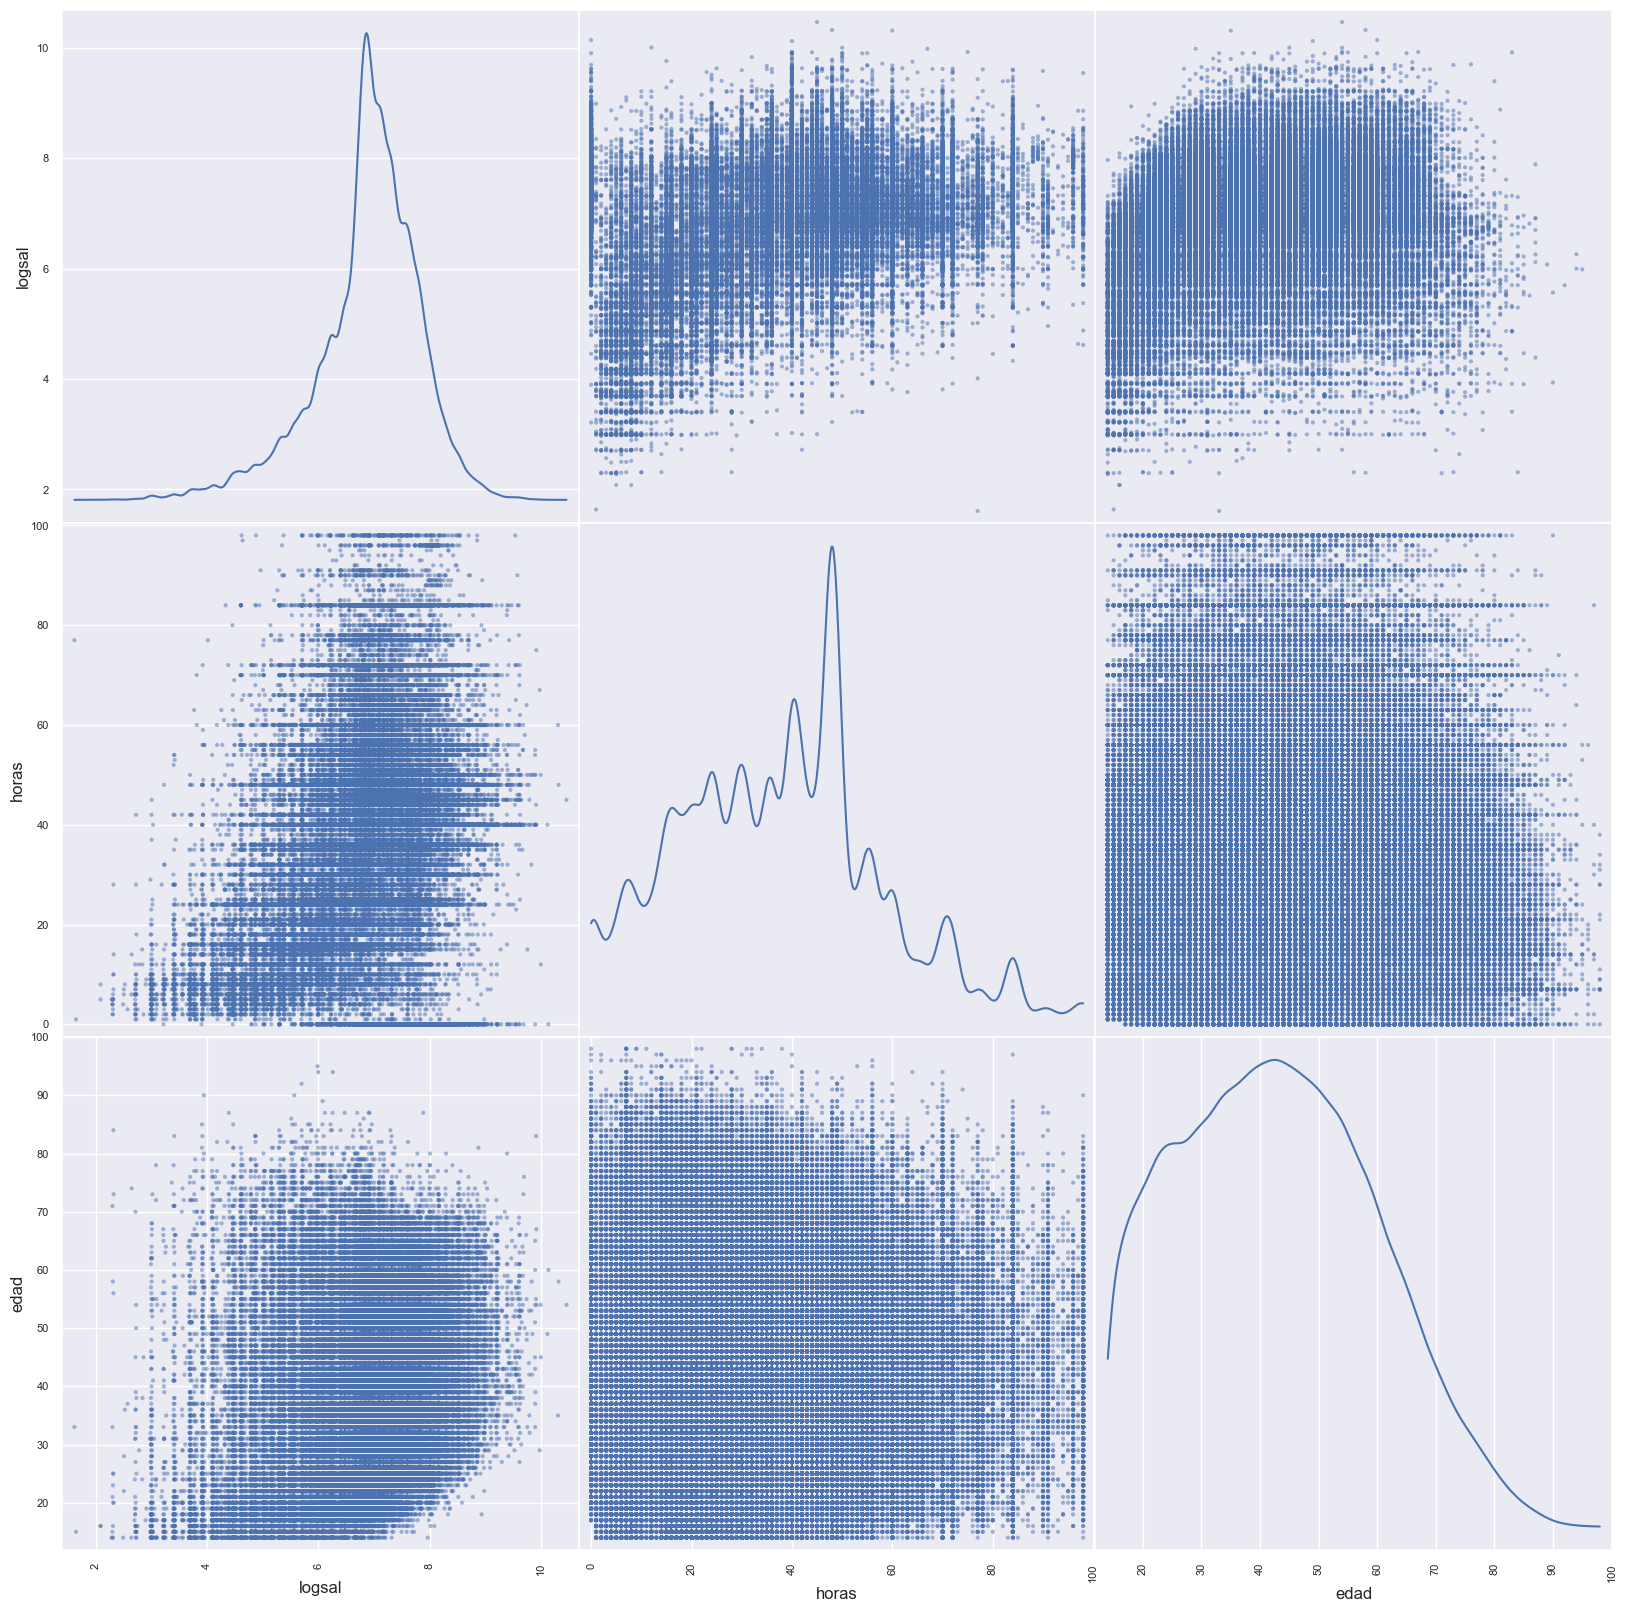

In [91]:
cols = ['logsal', 'horas', 'edad']
pd.plotting.scatter_matrix(data[cols], diagonal='kde', figsize = (20,20))
plt.show()